In [1]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from time import time

In [2]:
df = pd.read_csv("/home/damessina/Desktop/df_pulito.csv")

In [3]:
df.drop(columns=['Unnamed: 0', 'track_number','album_title', 'track_title', 'track_genres', 'track_genres_all', 'track_id', 'artist_id'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   track_bit_rate            25000 non-null  int64 
 1   track_date_created        25000 non-null  int64 
 2   track_duration            25000 non-null  int64 
 3   track_favorites           25000 non-null  int64 
 4   track_interest            25000 non-null  int64 
 5   track_listens             25000 non-null  int64 
 6   track_tags                25000 non-null  int64 
 7   album_comments            25000 non-null  int64 
 8   album_date_created        25000 non-null  int64 
 9   album_date_released       25000 non-null  int64 
 10  album_favorites           25000 non-null  int64 
 11  album_information         25000 non-null  int64 
 12  album_listens             25000 non-null  int64 
 13  album_tracks              25000 non-null  int64 
 14  album_tags            

In [5]:
df.drop(columns=['artist_associated_labels', 'artist_associated_labels', 'album_information', 'track_tags', 'album_tags', 'artist_website', 'album_comments'], inplace=True)

In [6]:
df_split1 = df[df['split']=='training']
df_split2 = df[df['split']=='validation']
con = [df_split1, df_split2]
df_train = pd.concat(con, ignore_index=True)
df_train.drop(columns=['split'], inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [7]:
df_train.replace({'artist_wikipedia_page' : {'Yes' : 1, 'No' : 0}}, inplace = True)
attributes_tr = [col for col in df_train.columns if col != 'artist_wikipedia_page']
X_train = df_train[attributes_tr].values
y_train = df_train['artist_wikipedia_page']

In [8]:
df_test = df[df['split']=='test']
df_test.drop(columns=['split'], inplace=True)
df_test.reset_index(drop=True, inplace=True)

/home/damessina/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df_test.replace({'artist_wikipedia_page' : {'Yes' : 1, 'No' : 0}}, inplace = True)
attributes_te = [col for col in df_test.columns if col != 'artist_wikipedia_page']
X_test = df_test[attributes_te].values
y_test = df_test['artist_wikipedia_page']

/home/damessina/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### standardizzo i dati

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### eseguo la pca

In [12]:
pca = PCA(n_components=3)
pca.fit(X_train)
X_pca = pca.transform(X_train)

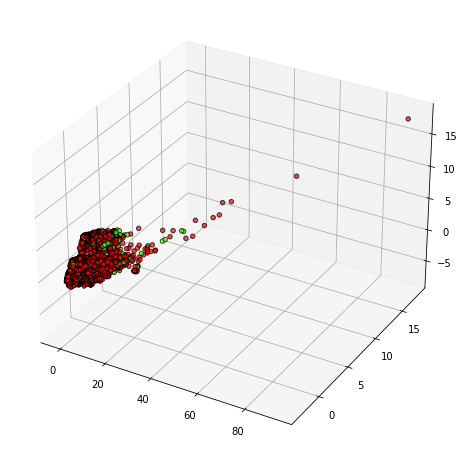

In [13]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

### testo il linear support vector machine classifier

In [17]:
clf = LinearSVC(C=130.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8507578701904391
F1-score [0.91763192 0.20661157]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2418
           1       0.15      0.32      0.21       155

    accuracy                           0.85      2573
   macro avg       0.55      0.60      0.56      2573
weighted avg       0.90      0.85      0.87      2573



/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [18]:
confusion_matrix(y_test, y_pred)

array([[2139,  279],
       [ 105,   50]])

### plotto i grafici e studio la variazione del parametro C

/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


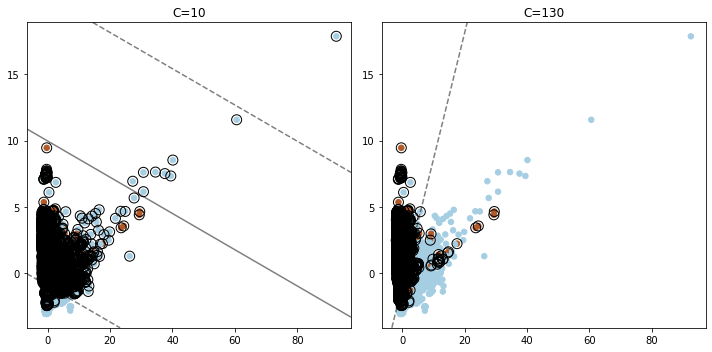

In [19]:
pca = PCA(n_components=2)
pca.fit(X_train)
X = pca.transform(X_train)
y = y_train
plt.figure(figsize=(10, 5))
for i, C in enumerate([10, 130]):
    # "hinge" is the standard SVM loss
    clf1 = LinearSVC(C=C, loss="squared_hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf1.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf1.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

## Crossvalidation

In [20]:
df_cross = df

df_cross.drop(columns=['split'], inplace=True)

attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = df_cross[attributes].values
y = df_cross['artist_wikipedia_page']

scores = cross_val_score(clf, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=5, scoring='recall_macro')
print('recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinea

Accuracy: 0.9454 (+/- 0.00)


/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinea

F1-score: 0.4859 (+/- 0.00)


/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


recall: 0.5000 (+/- 0.00)


/home/damessina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## ROC Curve

In [21]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test_bin= lb.transform(y_test)
by_pred_bin = lb.transform(y_pred)
by_test = np.hstack((by_test_bin, 1 - by_test_bin))
by_pred = np.hstack((by_pred_bin, 1 - by_pred_bin))

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

array([0.60359801, 0.60359801])

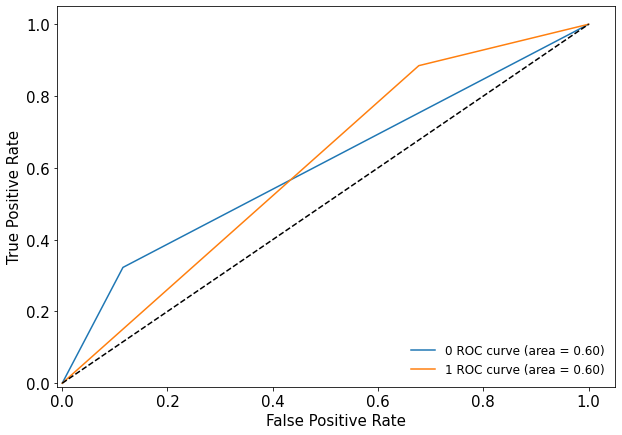

In [22]:
plt.figure(figsize=(10, 7))
for i in range(2):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.show()

## Non Linear SVM

In [24]:
clf1 = SVC(C = 210, gamma='auto', probability= True, cache_size = 7000)
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9389817333851536
F1-score [0.96746114 0.51090343]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2418
           1       0.49      0.53      0.51       155

    accuracy                           0.94      2573
   macro avg       0.73      0.75      0.74      2573
weighted avg       0.94      0.94      0.94      2573



In [25]:
confusion_matrix(y_test, y_pred)

array([[2334,   84],
       [  73,   82]])

In [19]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

fpr = dict()
tpr = dict()
roc_auc = dict()
by_test_bin= lb.transform(y_test)
by_pred_bin = lb.transform(y_pred)
by_test = np.hstack((by_test_bin, 1 - by_test_bin))
by_pred = np.hstack((by_pred_bin, 1 - by_pred_bin))

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(by_test[:, i], by_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

array([0.7471464, 0.7471464])

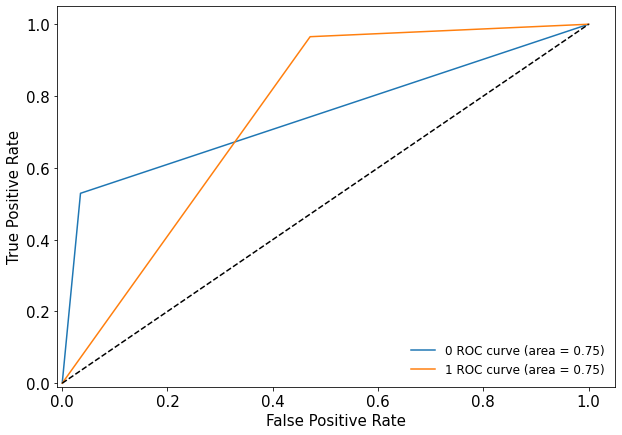

In [20]:
plt.figure(figsize=(10, 7))
for i in range(2):
    plt.plot(fpr[i], tpr[i], 
             label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist()[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.show()

In [21]:
df_cross = df

df_cross.drop(columns=['split'], inplace=True)

attributes = [col for col in df.columns if col != 'artist_wikipedia_page']
X = df_cross[attributes].values
y = df_cross['artist_wikipedia_page']

scores = cross_val_score(clf1, X, y, cv=5)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X, y, cv=5, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf1, X, y, cv=5, scoring='recall_macro')
print('recall: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.9454 (+/- 0.00)
F1-score: 0.4860 (+/- 0.00)
recall: 0.5000 (+/- 0.00)


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

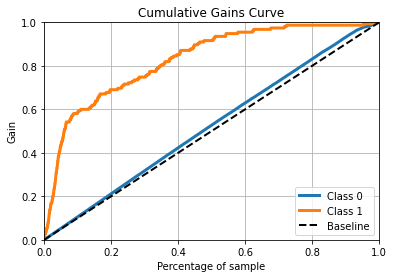

In [27]:
import scikitplot as skplt
predicted_probabilities_LR = clf1.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities_LR)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

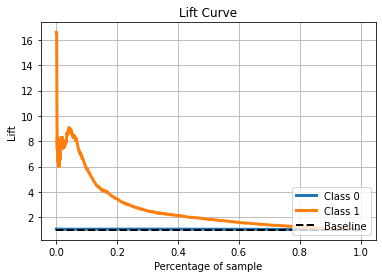

In [29]:
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities_LR)

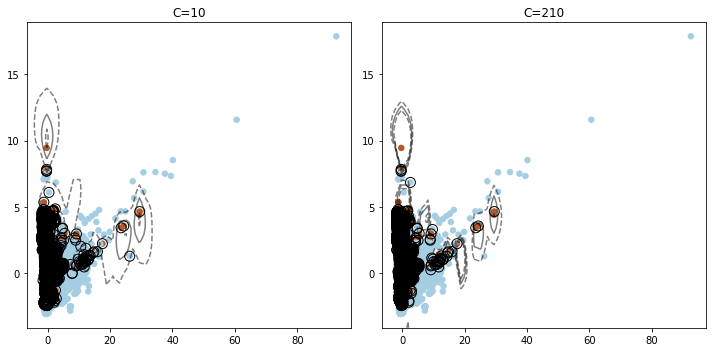

In [30]:
pca = PCA(n_components=2)
pca.fit(X_train)
X = pca.transform(X_train)
y = y_train
plt.figure(figsize=(10, 5))
for i, C in enumerate([10, 210]):
    # "hinge" is the standard SVM loss
    clf = SVC(C=C).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### provo a modificare il kernel 

In [14]:
clf2 = SVC(C = 200, kernel= 'poly', cache_size = 7000)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9347065682083171
F1-score [0.96536082 0.43243243]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2418
           1       0.45      0.41      0.43       155

    accuracy                           0.93      2573
   macro avg       0.71      0.69      0.70      2573
weighted avg       0.93      0.93      0.93      2573



In [15]:
clf3 = SVC(C = 200, kernel= 'sigmoid', cache_size = 7000)
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8853478429848426
F1-score [0.93908734 0.02640264]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2418
           1       0.03      0.03      0.03       155

    accuracy                           0.89      2573
   macro avg       0.48      0.48      0.48      2573
weighted avg       0.88      0.89      0.88      2573

